## ADAGARD algorithm using SGD

In [1]:
import pandas as pd
import math

In [2]:
l1=[0.2,0.4,0.6,0.8]
l2=[3.4,3.8,4.2,4.8]
d={'x':l1,'y':l2}
data=pd.DataFrame(d)

In [3]:
data

,x,y
0,0.2,3.4
1,0.4,3.8
2,0.6,4.2
3,0.8,4.8


In [4]:
m=1
c=-1
l=0.1
E=10**(-8)
Gm2=0
Gc2=0
e_list=[]

In [5]:
def y_value(m,c,x):
    return m*x+c

In [6]:
def error(y_actual,y_predicted):
    return 0.5*(y_actual-y_predicted)**2

In [7]:
def gradient(m,c,y_actual,x,Gm2,Gc2):
    g_m=(y_actual-m*x-c)*(-1)*x
    g_c=(y_actual-m*x-c)*(-1)
    Gm2=Gm2+(g_m**2)
    Gc2=Gc2+(g_c**2)
    m=m-((l*g_m)/math.sqrt(Gm2+E))
    c=c-((l*g_c)/math.sqrt(Gc2+E))
    return m,c,Gm2,Gc2

In [8]:
for i in range(150):
    for sample in range(len(data)):
        y_predicted=y_value(m,c,data['x'][sample])
        y_actual=data['y'][sample]
        e=error(y_actual,y_predicted)
        m,c,Gm2,Gc2=gradient(m,c,y_actual,data['x'][sample],Gm2,Gc2)
        e_list.append(e)

Text(0.5, 0, 'steps')

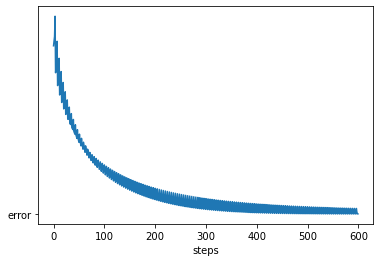

In [9]:
import matplotlib.pyplot as plt
plt.plot(e_list)
plt.plot("error")
plt.xlabel("steps")

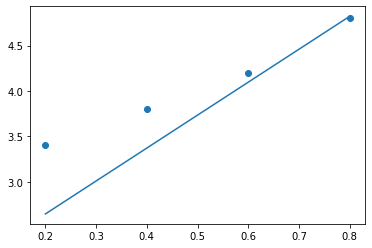

In [10]:
plt.scatter(data['x'],data['y'])
plt.plot(data['x'],m*data['x']+c)